In [26]:
# Отключаю предупреждения Anaconda (по стандарту как в видео - не удается)
import os
import sys
sys.stderr = open(os.devnull, "w")  # silence stderr
from sklearn.ensemble import RandomForestRegressor
sys.stderr = sys.__stderr__  # unsilence stderr
# Отключаю предупреждения Anaconda
import warnings
warnings.filterwarnings(action='ignore')

# Для работы с многомерными массивами
import numpy as np
# Инструменты для анализа данных
import pandas as pd
pd.set_option('display.max.columns', 100)
# Инструмент для построения графиков с помощью matplotlib
import pylab as plt
# Команда, чтобы графики выводились в тетрадке, а не отдельным файлом
%matplotlib inline
# Визуализация данных
import seaborn as sns
# Визуализация данных, на которых основываются другие модули
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
df = pd.read_csv('telecom_churn.csv')

In [3]:
# Проверка 1-х 5-ти строк
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Число строк(клиентов) и столбцов
df.shape

(3333, 20)

In [5]:
# Посмотрим, нет ли пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<table>
<thead>
<tr>
<th>Название</th>
<th>Описание</th>
<th>Тип</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>State</strong></td>
<td>Буквенный код штата</td>
<td>номинальный</td>
</tr>
<tr>
<td><strong>Account length</strong></td>
<td>Как долго клиент обслуживается компанией</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Area code</strong></td>
<td>Префикс номера телефона</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>International plan</strong></td>
<td>Международный роуминг  (подключен/не подключен)</td>
<td>бинарный</td>
</tr>
<tr>
<td><strong>Voice mail plan</strong></td>
<td>Голосовая почта (подключена/не подключена)</td>
<td>бинарный</td>
</tr>
<tr>
<td><strong>Number vmail messages</strong></td>
<td>Количество голосовых сообщений</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day minutes</strong></td>
<td>Общая длительность разговоров днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day calls</strong></td>
<td>Общее количество звонков днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day charge</strong></td>
<td>Общая сумма оплаты за услуги днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve minutes</strong></td>
<td>Общая длительность разговоров вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve calls</strong></td>
<td>Общее количество звонков вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve charge</strong></td>
<td>Общая сумма оплаты за услуги вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night minutes</strong></td>
<td>Общая длительность разговоров ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night calls</strong></td>
<td>Общее количество звонков ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night charge</strong></td>
<td>Общая сумма оплаты за услуги ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl minutes</strong></td>
<td>Общая длительность международных разговоров</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl calls</strong></td>
<td>Общее количество международных разговоров</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl charge</strong></td>
<td>Общая сумма оплаты за международные разговоры</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Customer service calls</strong></td>
<td>Число обращений в сервисный центр</td>
<td>количественный</td>
</tr>
</tbody>
</table>

In [6]:
# Churn -  отток клиентов (1 - потеря клиента)
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

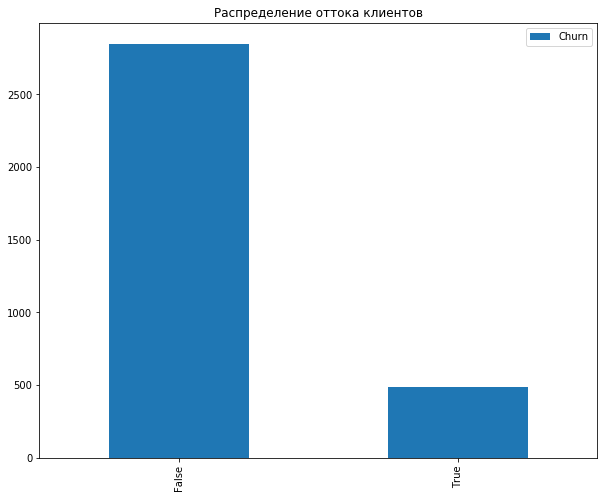

In [7]:
# plot - создание графика, label - строка легенды (в правом верхнем углу)
# kind - тип диаграммы (bar - вертикальная)
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
# title - подпись графика
plt.title('Распределение оттока клиентов');

In [8]:
# Просмотрим кореляцию количественных признаков
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

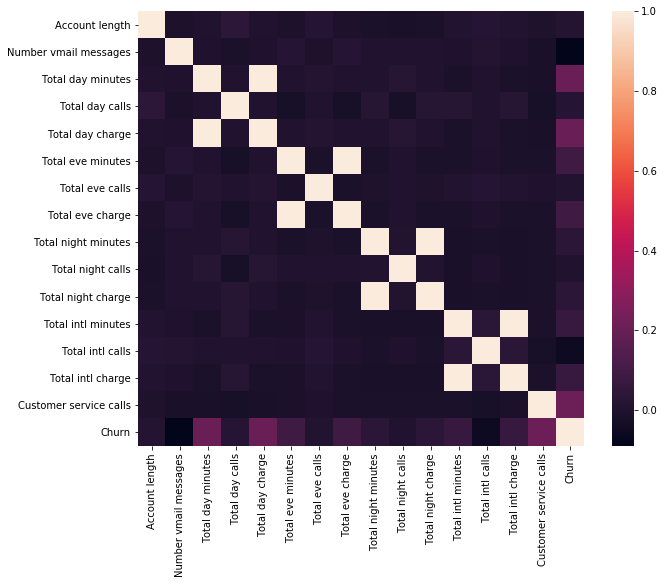

In [9]:
sns.heatmap(corr_matrix);
# Найдена прямая зависимость charge от minutes (одно и то же)
# Значит, можно убрать 4 признака minutes - не несут полезной информации

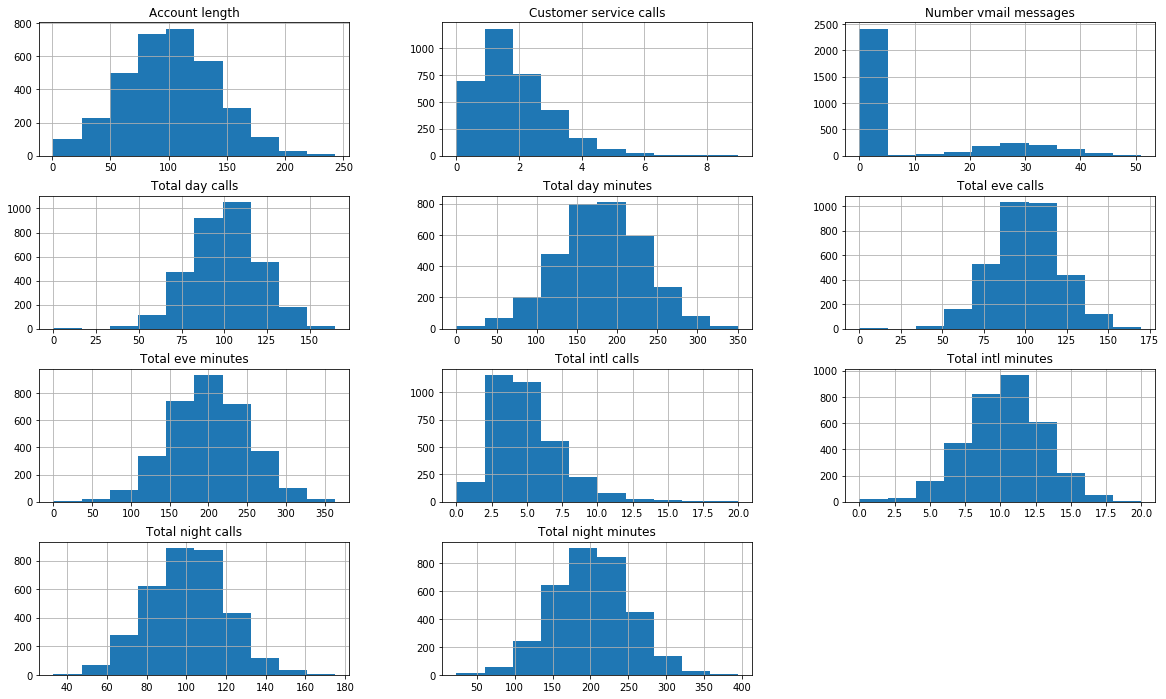

In [10]:
# Рассмотрим все интересующие количественные признаки
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

# hist - построить гистограмму
# figsize=(ширина, высота)
df[features].hist(figsize=(20,12));

In [11]:
# Большинство признаков распределено нормально
# Исключения: Звонки в сц, Число голосовых сообщений
# Число международных звонков

In [12]:
# Диаграмма почему-то ломается
# sns.pairplot(df[features + ['Churn']], hue='Churn');

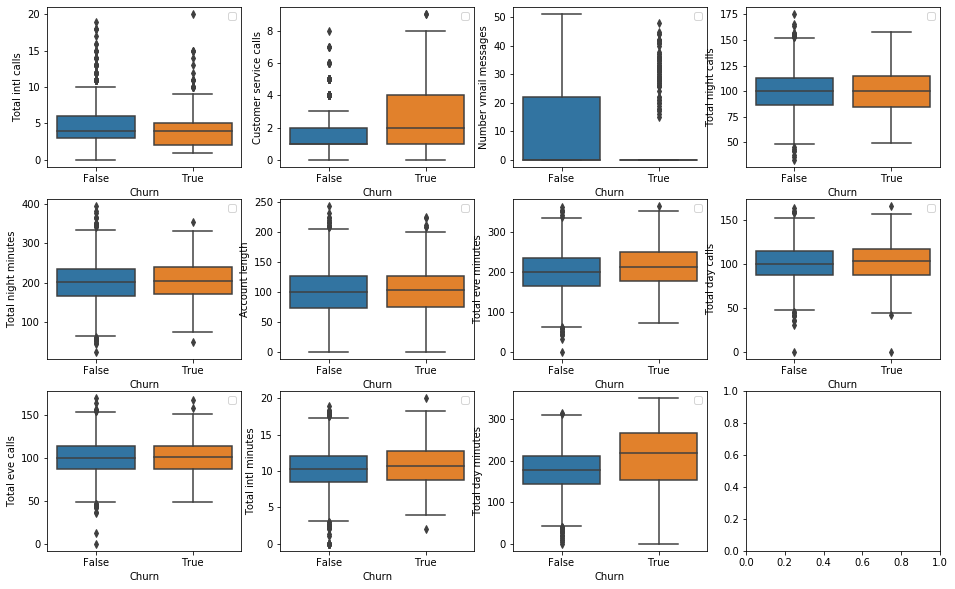

In [13]:
# Создаем макет фигур
# nrows - количество строк, ncols - количество столбцов
# figsize(ширина, высота) - диаграмм
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in enumerate(features):
    # Показывает средние значения в графике относительно признаков
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    
    # axes[выбираем столбец, выбираем строку].называем оси x и y
    # 0/4 = 0.0; 1/4 = 1.25; 0%4 = 0; 1%4 = 1
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

# Заметно отличие признаков: 
# Total day minutes - Ушедшие звонили больше, чем сохранившиеся клиенты
# Customer service calls - Ушедшие чаще обращались в сц
# Number vmail messages - нужно проверить признак на пригодность

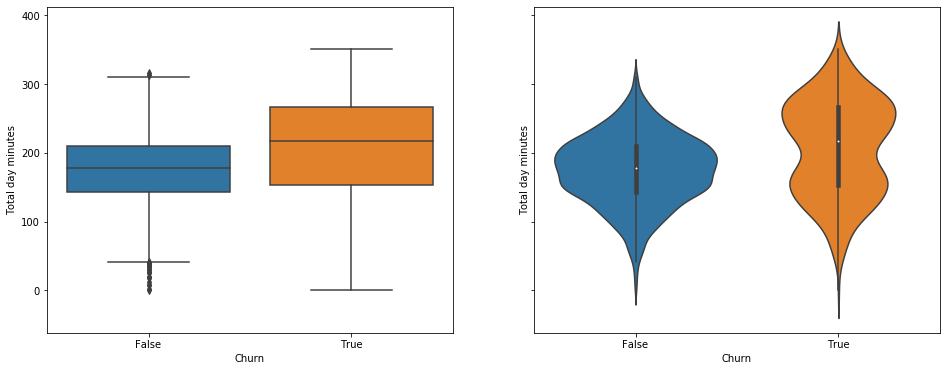

In [14]:
# 1, 2 - кратко указали количество строк и столбцов, вместо nrows и ncols
# sharey=True - ось y общая для всех графиков
# Создаем макет для диаграмм
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

# Настраиваем тип и признаки графиков
# ax - указывает к какому графику вводить данные
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

# Вывод: Ушедшие клиенты больше пользуются связью
# Теория: Много пользующиеся связь клиенты недовольны своим тарифом

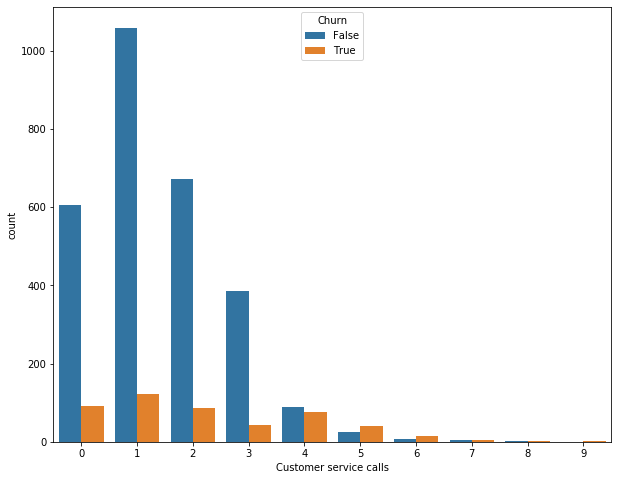

In [15]:
# Изобразим количество обращений в сервисный центр
# Тут мало уникальных значений признака, поэтому можно использовать обычную диаграмму
sns.countplot(x='Customer service calls', hue='Churn', data=df);
# Вывод: доля оттока сильно возрастает начиная с 4-х звонков в сц

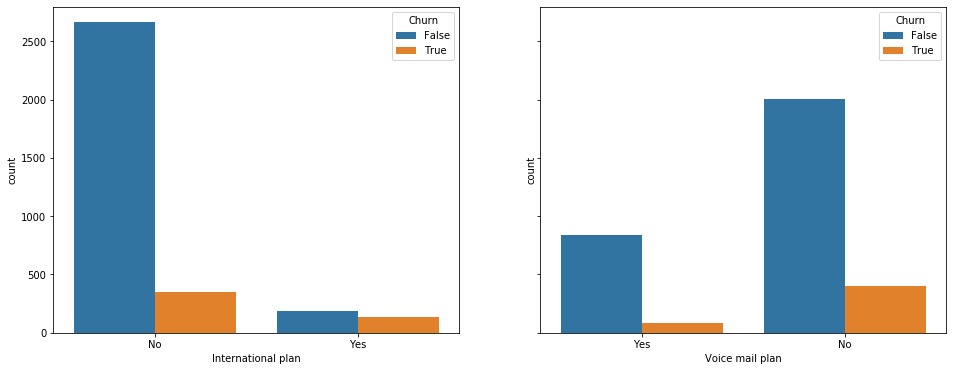

In [16]:
# Посмотрим связь бинарных значений с оттоком
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

# Вывод: Доля оттока очень высока, если подключени международный роуминг

In [17]:
# Проверим признак State. Значений очень много - 51
# Построим таблицу для просмотра количества ушедщих клиентов для каждого штата
# Для каждого штата количество ушедших клиентов от 3 до 18 - слишком мало данных чтобы делать какие-то выводы
# .T - вывести значения в ширину (в столбец), а не в высоту (строку)
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9


In [18]:
# groupby - группирование данных
# .agg - объединение столбцов и применение функции
# np.mean - соотношение ушедших относительно общего числа клиентов (процентное / 100%)
# sort_values - сортировка по значению
# by - дожно соответствовать название сортировки как в .agg([np.название])
# ascending=False - сортировать значения в порядке убывания
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,MT,AR,KS,NY,MN,PA,MA,CT,NC,NH,GA,DE,OK,OR,UT,CO,KY,SD,OH,FL,IN,ID,WY,MO,VT,AL,NM,ND,WV,TN,DC,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,0.205882,0.2,0.185714,0.180723,0.178571,0.177778,0.169231,0.162162,0.161765,0.160714,0.148148,0.147541,0.147541,0.141026,0.138889,0.136364,0.135593,0.133333,0.128205,0.126984,0.126761,0.123288,0.116883,0.111111,0.109589,0.1,0.096774,0.096774,0.09434,0.09434,0.092593,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [19]:
# t-SNE - визуальное представление данных, при котором похожие объекты моделируются близко расположенными точками
# Непохожие объекты стоят далеко друг от друга
from sklearn.manifold import TSNE
# Масштабировать выборку
# Из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.
from sklearn.preprocessing import StandardScaler

In [20]:
# Преобразуем все признаки в числовые, выкинув штаты
# axis=0 - удалить по индексу, axis=1 - удалить по строке
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Каждый столбец должен иметь среднее значение 0, а стандартное отклонение 1 - sklearn ожидает такие входные данные
# StandardScaler() - стандартизирует каждую колонку x, как указано выше
# Стандартное отклонение - показывает, как распределены значения относительно среднего в нашей выборке
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
%%time
# random_state=17 - генерируем случайные числа, которые в дальнейшем всегда будут вызываться одинаково - псевдослучайность
tsne = TSNE(random_state=17)
# Выстраивает список координат по оси

#[[  9.715601  -61.124607 ]
# [ 37.550423  -65.09309  ]
# [-10.383023   44.289795 ]
# ...
# [ 32.93983     2.2348654]
# [-15.440466  -29.387072 ]
# [ 10.1491585 -56.23608  ]]

tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 1min 1s, sys: 437 ms, total: 1min 2s
Wall time: 8.33 s


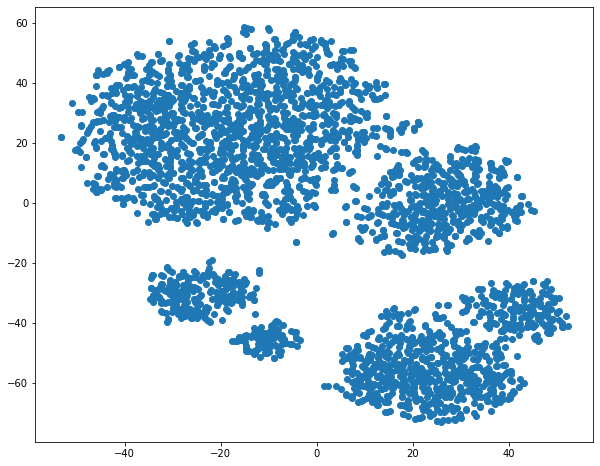

In [22]:
# Выстраивает из списка координат [:, 0] - x; [:, 1] - y
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

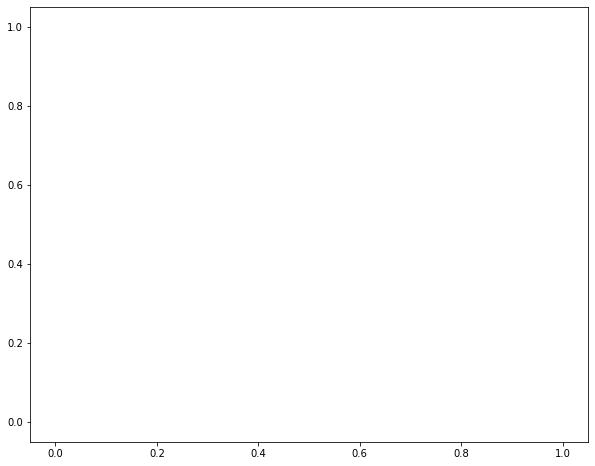

In [25]:
# Раскрасим данные по оттоку: Ушедшие - оранжевым, Оставшиеся - синим
# Не работает, возможно, потому что удалили из x столбец 'Churn'
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df['Churn'].map({0: 'blue', 1: 'orange'}));

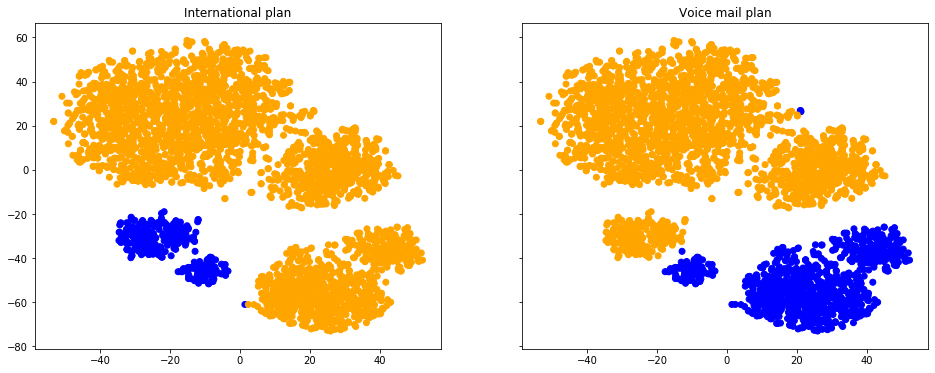

In [27]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# c= - указать цвет для признаков
axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');

In [ ]:
# t-SNE не используется в реальных проектах, используется Multicore-TSNE
# https://github.com/DmitryUlyanov/Multicore-TSNE